<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_05_NoiseReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL
from scipy.signal import convolve

In [ ]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

def read_file(fname:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image 
    in a numpy array.

    Args:
        fname: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, fname)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [ ]:
def plot_images(img1:np.array, img2:np.array):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    axes[0].imshow(img1,  cmap='gray')
    axes[1].imshow(img2,  cmap='gray')

# 5. Noise Reduction

##5.1 Gaussian Noise

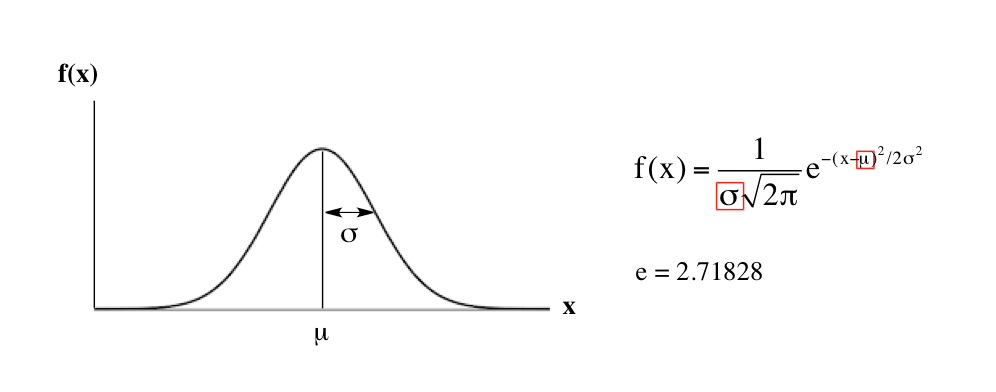

$$I^{'}(x,y)=I(x,y)+g(\mu,\sigma)$$

Note that we select that the mean of the noise will be 0

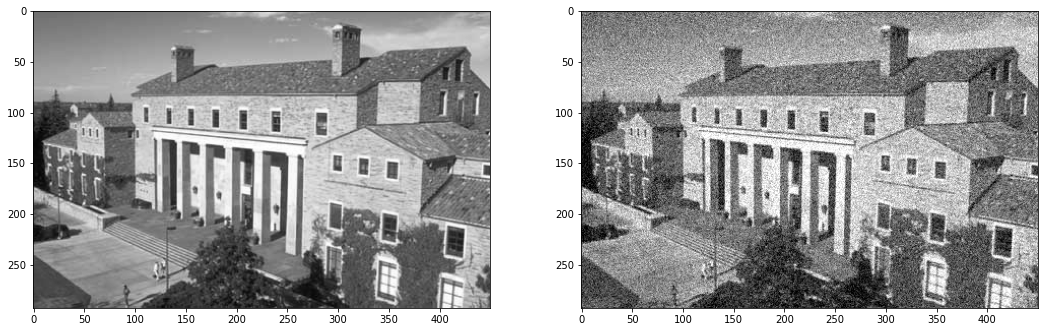

In [ ]:
img = read_file(fname='house.tiff') / 255

img1 = img.copy()
nrows, ncols = img1.shape
for r in range(nrows):
    for c in range(ncols):
        img1[r,c] += np.random.normal(0.0, 0.1)
img1 = np.clip(img1, a_min=0.0, a_max=1.0)
plot_images(img, img1)

**Q: what will happen if we will increase the standard deviation?**

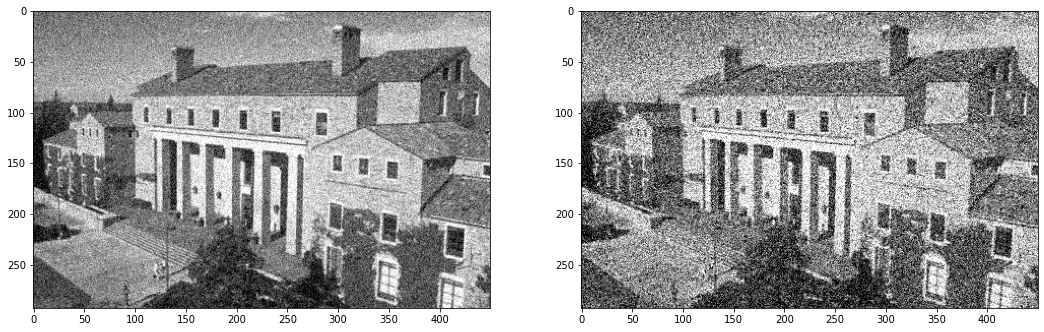

In [ ]:
img2 = img.copy()
nrows, ncols = img2.shape
for r in range(nrows):
    for c in range(ncols):
        img2[r,c] += np.random.normal(0.0, 0.2)
img2 = np.clip(img2, a_min=0.0, a_max=1.0)
plot_images(img1, img2)

### Gaussian noise in digital images

Principal sources of Gaussian noise in digital images arise during acquisition:
- sensor noise caused by poor illumination 
- high temperature
- electronic circuit noise.

## 5.2 Gaussian Smoothing

**2-d Convolution:**

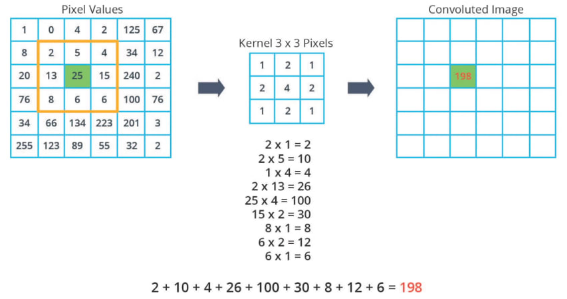

**Average Smoothing**

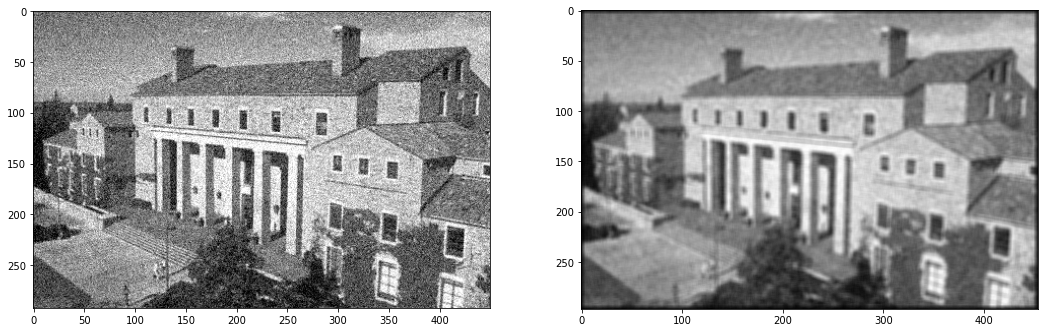

In [ ]:
FILTER_SIZE = 5
filter=np.ones(shape=(FILTER_SIZE, FILTER_SIZE)) / (FILTER_SIZE**2)
img2 = convolve(in1=img1, in2=filter)

plot_images(img1, img2)

**Gaussian Smoothing**

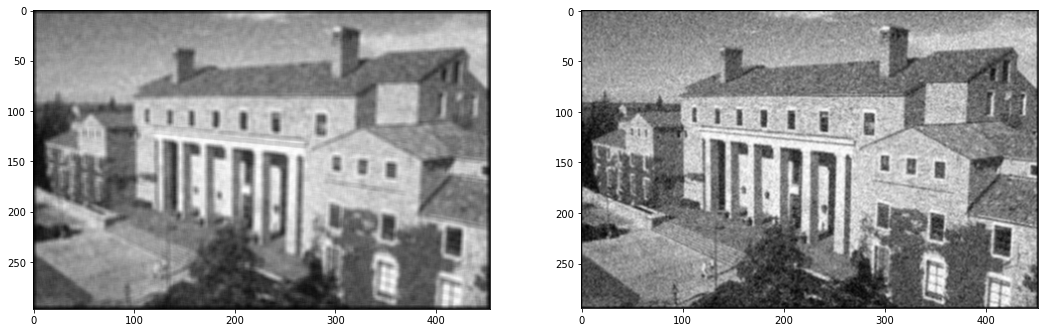

In [ ]:
filter = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]])
filter = filter / filter.sum()
img3 = convolve(in1=img1, in2=filter)

plot_images(img2, img3)

##5.2 Directional Smoothing

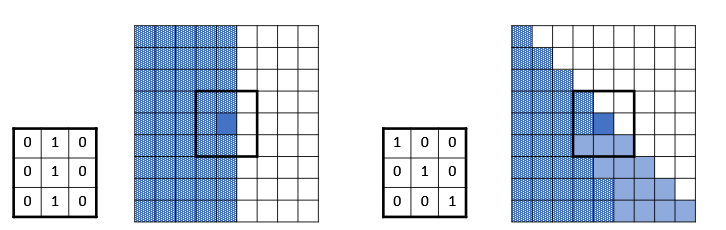

1. We will create *n* masks (e.g., 5 as bellow). 
2. For each of the mask we will perform a convolution and generate *n* images. 
3. We will go over all the pixels, one at a time, and compare the difference between the pixel value in original image, $I(x,y)$, and the generated images, $I_j^{'}(x,y)$, and select the closest one: $|I(x,y)-I_j^{'}(x,y)|$.

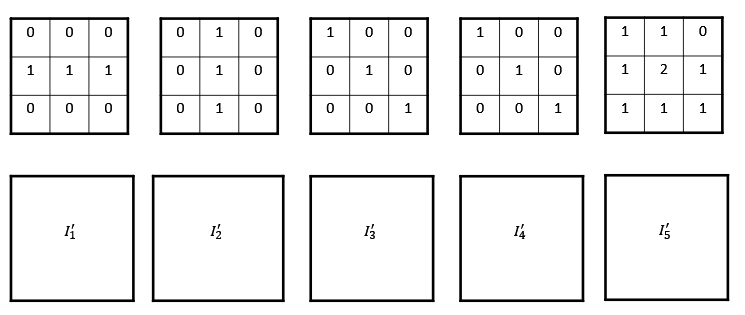

In [ ]:
mask1 = np.array([[0,0,0],
                  [1,1,1],
                  [0,0,0]]) / 3
mask2 = mask1.T
mask3 = np.eye(3) / 3

conv1 = convolve(in1=img1, in2=mask1, mode="same")
conv2 = convolve(in1=img1, in2=mask2, mode="same")
conv3 = convolve(in1=img1, in2=mask3, mode="same")
nrows, ncols = img1.shape
img_e = np.zeros((nrows, ncols))
for r in range(nrows):
    for c in range(ncols):
        convs = [conv1[r,c], conv2[r,c], conv3[r,c]]
        dists = abs(convs - img1[r,c])
        min_ind = dists.argmin()
        img_e[r, c] = convs[min_ind]

**Note:** too many filters may result in overfitting!

**Motivation: smoothing with edges preservation**